In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['lable', 'text'])

In [7]:
df

,lable,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5572, 2)

In [9]:
import nltk

In [10]:
nltk.download('stopwords')  # It removes the common sentence fillers this, the, to, is.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lokeshsonawane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lokeshsonawane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
sent = "How are you friends?"

In [14]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['How', 'are', 'you', 'friends', '?']

In [15]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [16]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [17]:
clean

['How', 'friends', '?']

In [19]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]  ## Stem word or root word.
    clean = [ps.stem(word) for word in clean
    if word not in swords]
    return clean

In [21]:
clean_text(sent)

['how', 'friend']

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)

In [24]:
x = df['text']
y = df['lable']

In [25]:
x_new = tfidf.fit_transform(x)

In [26]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

In [27]:
x.shape

(5572,)

In [28]:
x_new.shape

(5572, 6513)

<Axes: xlabel='lable', ylabel='count'>

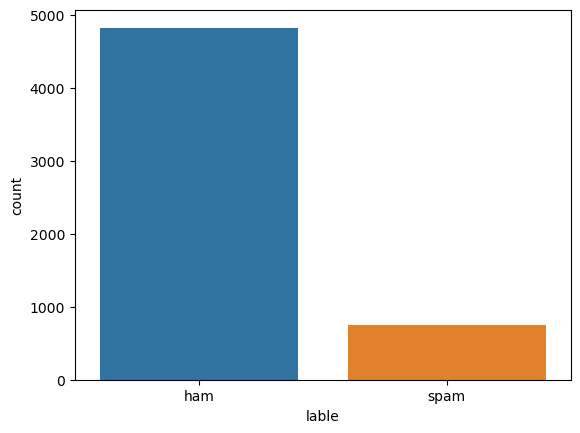

In [29]:
import seaborn as sns 
sns.countplot(x=y)

In [30]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=1)

In [31]:
print(f"Size of splitted data") 
print(f"x_train {x_train.shape}") 
print(f"y_train {y_train.shape}") 
print(f"y_test {x_test.shape}") 
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (4179, 6513)
y_train (4179,)
y_test (1393, 6513)
y_test (1393,)


In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)  # ".toarray" is used to ensure compatibility with the Gaussian Naive Bayes classifier's requirements.
y_pred_nb = nb.predict(x_test.toarray())

In [34]:
y_test.value_counts()

lable
ham     1208
spam     185
Name: count, dtype: int64

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

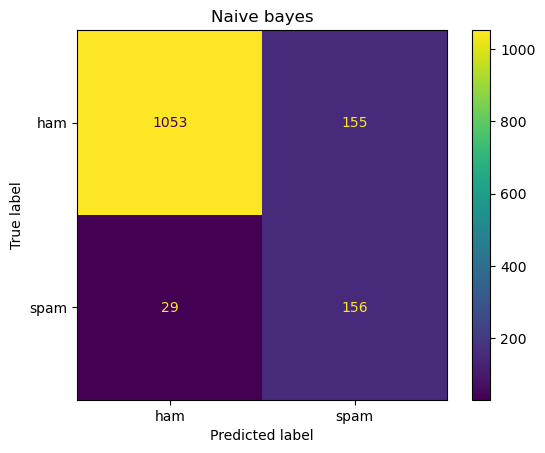

 Accuracy is 0.867910983488873
              precision    recall  f1-score   support

         ham       0.97      0.87      0.92      1208
        spam       0.50      0.84      0.63       185

    accuracy                           0.87      1393
   macro avg       0.74      0.86      0.77      1393
weighted avg       0.91      0.87      0.88      1393



In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb) 
plt.title('Naive bayes')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_nb)}") 
print(classification_report(y_test,y_pred_nb))

In [37]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(random_state=1) 
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [38]:
y_pred_rf = model_rf.predict(x_test) #float

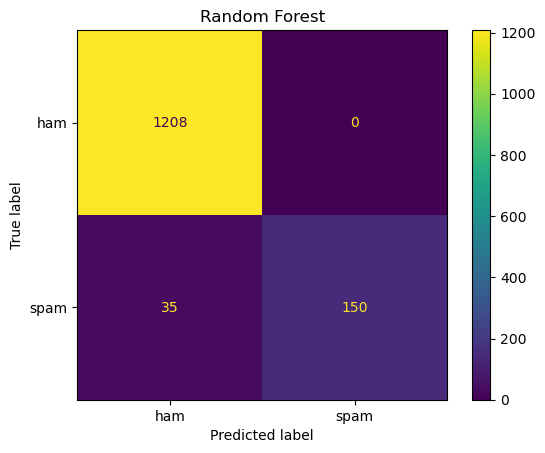

 Accuracy is 0.9748743718592965
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.81      0.90       185

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [39]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf) 
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}") 
print(classification_report(y_test,y_pred_rf))

In [40]:
from sklearn.linear_model import LogisticRegression 
model_lr = LogisticRegression(random_state=1)
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)

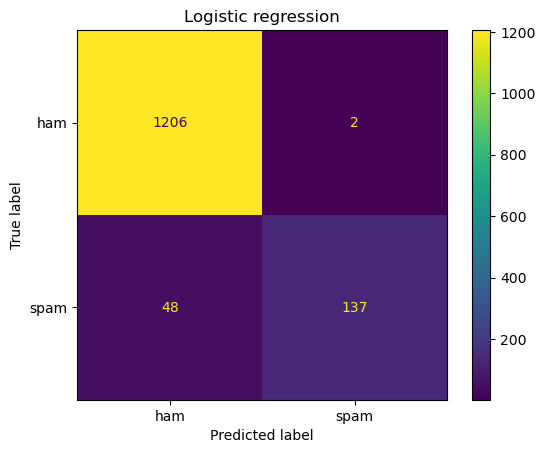

 Accuracy is 0.9641062455132807
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.85       185

    accuracy                           0.96      1393
   macro avg       0.97      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr) 
plt.title('Logistic regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}") 
print(classification_report(y_test,y_pred_lr))

In [58]:
from sklearn.model_selection import GridSearchCV
para = {
    
    'criterion':['gini', 'entropy','log_loss'], 
    'class_weight':['balanced','balanced_subsample']
}

In [59]:
grid = GridSearchCV(model_rf, param_grid=para, cv=5, scoring='accuracy')

In [60]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [61]:
rf = grid.best_estimator_

In [62]:
y_pred_grid = rf.predict(x_test)

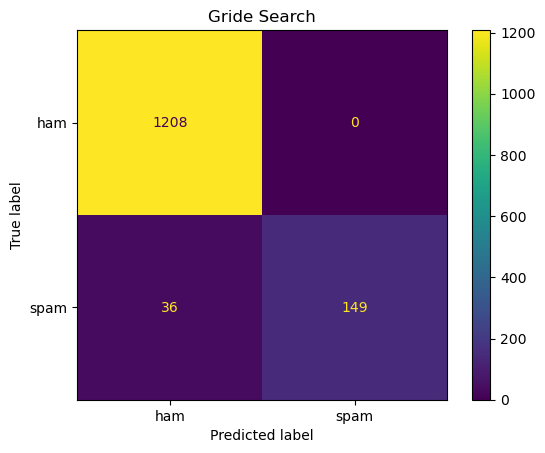

 Accuracy is 0.9741564967695621
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1208
        spam       1.00      0.81      0.89       185

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [51]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid) 
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_grid)}")
print(classification_report(y_test,y_pred_grid))